<a href="https://colab.research.google.com/github/BibaswanBiswas/ChronosTrade-Stock-Market-Analysis-using-ML/blob/main/Sentiment_analysis_and_Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from textblob import TextBlob
import pandas as pd

In [ ]:

df = pd.read_csv("data.csv")
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
df["Sentiment_Predicted"] = df["review"].apply(get_sentiment)

print(df.head())


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

  Sentiment_Predicted  
0            Positive  
1            Positive  
2            Positive  
3            Negative  
4            Positive  


In [ ]:
sentiment_counts = df["Sentiment_Predicted"].value_counts()
sentiment_percent = df["Sentiment_Predicted"].value_counts(normalize=True) * 100

print("Sentiment Counts:\n", sentiment_counts)
print("\nPredicted Sentiment Percentage:\n", sentiment_percent)


Sentiment Counts:
 Sentiment_Predicted
Positive    37934
Negative    12036
Neutral        30
Name: count, dtype: int64

Predicted Sentiment Percentage:
 Sentiment_Predicted
Positive    75.868
Negative    24.072
Neutral      0.060
Name: proportion, dtype: float64


In [ ]:
sentiment_counts = df["sentiment"].value_counts()
sentiment_percent = df["sentiment"].value_counts(normalize=True) * 100

print("Sentiment Counts:\n", sentiment_counts)
print("\nGiven Sentiment Percentage:\n", sentiment_percent)


Sentiment Counts:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Given Sentiment Percentage:
 sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


PART 2


In [ ]:
import kagglehub
path = kagglehub.dataset_download("aaron7sun/stocknews")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'stocknews' dataset.
Path to dataset files: /kaggle/input/stocknews


In [ ]:
import os
print(os.listdir(path))

['upload_DJIA_table.csv', 'Combined_News_DJIA.csv', 'RedditNews.csv']


In [ ]:
news = pd.read_csv(path + "/Combined_News_DJIA.csv")
print(news.head())

         Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we woul

In [ ]:
headline_cols = [col for col in news.columns if col.startswith("Top")]
news["combined_news"] = news[headline_cols].apply(
    lambda row: " ".join(row.values.astype(str)), axis=1
)

In [ ]:
def get_sentiment_score(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    return polarity

news["sentiment"] = news["combined_news"].apply(get_sentiment_score)


In [ ]:
stock = yf.download("^DJI", start="2008-08-08", end="2016-07-01")
stock.reset_index(inplace=True)
stock.columns = stock.columns.get_level_values(0)


/tmp/ipython-input-1168555374.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("^DJI", start="2008-08-08", end="2016-07-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
news["Date"] = pd.to_datetime(news["Date"])
stock["Date"] = pd.to_datetime(stock["Date"])


In [ ]:
print(stock.columns)



Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [ ]:
stock.columns = stock.columns.get_level_values(0)


In [ ]:
print(stock.columns)


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [ ]:
stock["Date"] = pd.to_datetime(stock["Date"])
news["Date"] = pd.to_datetime(news["Date"])


In [ ]:
merged = pd.merge(
    stock,
    news[["Date", "sentiment"]],
    on="Date",
    how="inner"
)

print(merged.head())


        Date         Close          High           Low          Open  \
0 2008-08-08  11734.320312  11759.959961  11388.040039  11432.089844   
1 2008-08-11  11782.349609  11867.110352  11675.530273  11729.669922   
2 2008-08-12  11642.469727  11782.349609  11601.519531  11781.700195   
3 2008-08-13  11532.959961  11633.780273  11453.339844  11632.809570   
4 2008-08-14  11615.929688  11718.280273  11450.889648  11532.070312   

      Volume  sentiment  
0  212830000  -0.048568  
1  183190000   0.121956  
2  173590000  -0.046530  
3  182550000   0.011398  
4  159790000   0.040677  


In [ ]:
final_data = merged[["Date", "Close", "sentiment"]]
print(final_data.head())


        Date         Close  sentiment
0 2008-08-08  11734.320312  -0.048568
1 2008-08-11  11782.349609   0.121956
2 2008-08-12  11642.469727  -0.046530
3 2008-08-13  11532.959961   0.011398
4 2008-08-14  11615.929688   0.040677


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(final_data[["Close", "sentiment"]])


In [ ]:
def create_sequences(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i, 0])  # Close price
    return np.array(X), np.array(y)

X, y = create_sequences(scaled)


In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
X_price = scaled[:, 0].reshape(-1, 1)
X_p, y_p = create_sequences(X_price)

X_train_p, X_test_p = X_p[:split], X_p[split:]
y_train_p, y_test_p = y_p[:split], y_p[split:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_price = Sequential([
    LSTM(50, input_shape=(X_train_p.shape[1], 1)),
    Dense(1)
])

model_price.compile(optimizer="adam", loss="mse")
model_price.fit(X_train_p, y_train_p, epochs=10, batch_size=32, verbose=0)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_sent = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model_sent.compile(optimizer="adam", loss="mse")
model_sent.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)


In [ ]:
from sklearn.metrics import mean_squared_error
import math

pred_price = model_price.predict(X_test_p)
pred_sent = model_sent.predict(X_test)

rmse_price = math.sqrt(mean_squared_error(y_test_p, pred_price))
rmse_sent = math.sqrt(mean_squared_error(y_test, pred_sent))

print("RMSE (Price-only):", rmse_price)
print("RMSE (Price + Sentiment):", rmse_sent)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RMSE (Price-only): 0.026266901883671912
RMSE (Price + Sentiment): 0.025567621732948565


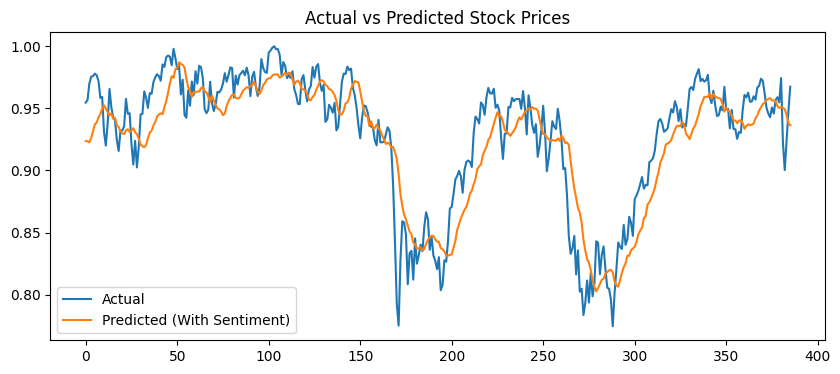

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(y_test, label="Actual")
plt.plot(pred_sent, label="Predicted (With Sentiment)")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.show()
